In [13]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

In [9]:
batch_size = 16
train_data = torchvision.datasets.MNIST('MNIST', train=True, transform=torchvision.transforms.ToTensor())
train_dl = torch.utils.data.DataLoader(train_data, batch_size=batch_size)

test_data = torchvision.datasets.MNIST('MNIST', train=False, transform=torchvision.transforms.ToTensor())
test_dl = torch.utils.data.DataLoader(test_data, batch_size=1)

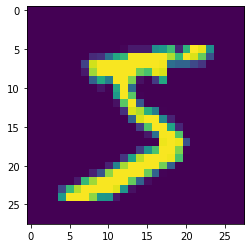

In [10]:
plt.imshow(train_data[0][0][0])

In [11]:
28 * 28

784

In [59]:
def flatten(x):
    return x.view(x.shape[0], -1)

class FirstNetwork(nn.Module):
    
    def __init__(self):
        super(FirstNetwork, self).__init__()
        self.first_layer = nn.Linear(784, 200)
        self.second_layer = nn.Linear(200, 10)
        
    def forward(self, x):
        flattened_x = flatten(x)
        hidden_values = torch.nn.functional.relu(self.first_layer(flattened_x))
        output_logits = self.second_layer(hidden_values)
        return torch.nn.functional.softmax(output_logits, dim=-1)
    
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        self.first_conv = nn.Conv2d(1, 5, kernel_size=3, padding=1)
        self.MaxPool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.second_conv = nn.Conv2d(5, 5, kernel_size=3, padding=1)
        self.final_layer = nn.Linear(245,10)
        
    def forward(self, x):
        first_result = self.relu(self.MaxPool(self.first_conv(x)))
        second_result = self.relu(self.MaxPool(self.second_conv(first_result)))
        logits = self.final_layer(flatten(second_result))
        return nn.functional.softmax(logits, dim=-1)

In [26]:
net = Convnet()#FirstNetwork()

In [27]:
example = train_data[0][0]

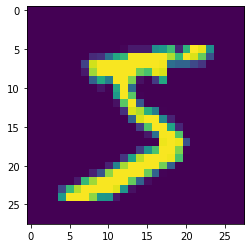

In [28]:
plt.imshow(example[0])

In [61]:
net = ConvNet()
losses = []
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [62]:
from tqdm import tqdm

In [63]:
for input_data, labels in tqdm(train_dl):
    optimizer.zero_grad()
    predictions = net(input_data)
    loss = torch.mean(-1 * torch.log(predictions.gather(1, labels.reshape(-1,1))))
    loss.backward()
    optimizer.step()
    losses.append(loss.detach().numpy())

100%|██████████| 3750/3750 [00:55<00:00, 67.73it/s] 


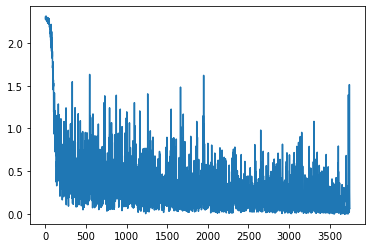

In [64]:
plt.plot(losses)

In [71]:
# example.unsqueeze(0).shape
net(example.unsqueeze(0))[0][5]

tensor(0.9601, grad_fn=<SelectBackward>)

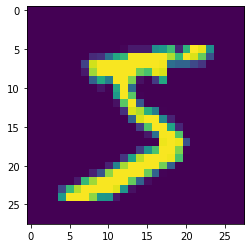

In [53]:
plt.imshow(example[0])